In [4]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification

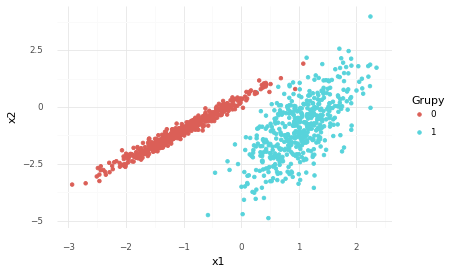

<ggplot: (143914390279)>

In [16]:
n = 1000

X, y = make_classification (n_samples = n,
                            n_features = 2,
                            n_redundant = 0,
                            n_clusters_per_class = 1,
                            random_state = 4)

df = pd.DataFrame(X,columns = ['x1', 'x2'])
df['Grupy'] = y

(ggplot(df, aes(x = 'x1', y = 'x2', color = 'factor(Grupy)')) +
 geom_point() +
 theme_minimal() +
 labs(color = 'Grupy'))

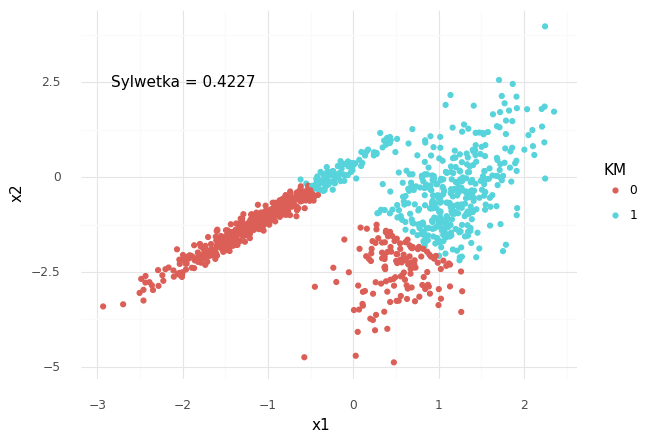

<ggplot: (143889901367)>

In [29]:
km = KMeans(n_clusters=2).fit(df[['x1', 'x2']])

df['klaster_km'] = km.labels_
sylwetka_km = round(silhouette_score(df[['x1', 'x2']], km.labels_), 4)

(ggplot(df, aes(x = 'x1', y = 'x2', color = 'factor(klaster_km)')) +
 geom_point() +
 annotate('text', x=-2, y=2.5, label=f'Sylwetka = {sylwetka_km}') +
 theme_minimal() +
 labs(color = 'KM'))

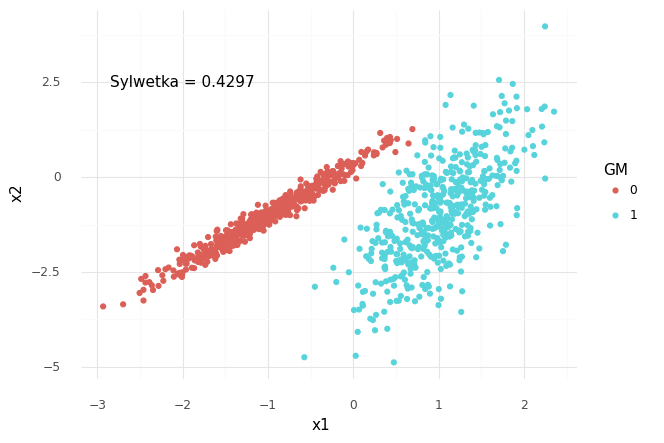

<ggplot: (143916461668)>

In [35]:
gm = GaussianMixture(n_components=2).fit(df[['x1', 'x2']])

df['klastry_gm'] = gm.predict(df[['x1', 'x2']])
sylwetka_gm = round(silhouette_score(df[['x1', 'x2']], gm.predict(df[['x1', 'x2']])), 4)

(ggplot(df, aes(x = 'x1', y = 'x2', color = 'factor(klastry_gm)')) +
 geom_point() +
 annotate('text', x=-2, y=2.5, label=f'Sylwetka = {sylwetka_gm}') +
 theme_minimal() +
 labs(color = 'GM'))

### DBSCAN


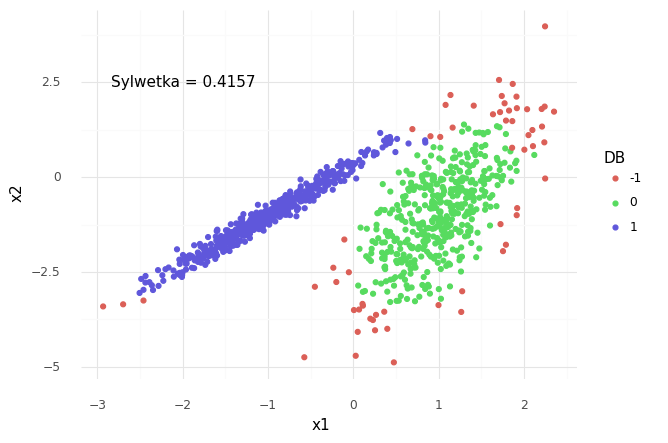

<ggplot: (143916733450)>

In [52]:
db = DBSCAN(eps=0.3, min_samples=10).fit(df[['x1', 'x2']])

df['klastry_db'] = db.labels_
sylwetka_db = round(silhouette_score(df[['x1', 'x2']], db.labels_), 4)

(ggplot(df, aes(x = 'x1', y = 'x2', color = 'factor(klastry_db)')) +
 geom_point() +
 annotate('text', x=-2, y=2.5, label=f'Sylwetka = {sylwetka_db}') +
 theme_minimal() +
 labs(color = 'DB'))

### Auta

In [55]:
df = pd.read_csv('auta.csv', index_col=0)

In [57]:
df.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,20900.0,164450.0,1896.0,110,66.9
Audi A4,25311.4,182000.0,1900.0,130,75.7
Audi A6,31500.0,185000.0,2496.0,170,82.5
Audi A8,109000.0,129380.0,4134.0,300,68.1
Audi Q7,179000.0,72000.0,3000.0,240,89.1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Audi A3 to Volvo V50
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cena       53 non-null     float64
 1   Przebieg   53 non-null     float64
 2   Pojemnosc  53 non-null     float64
 3   KM         53 non-null     int64  
 4   diesle     53 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5+ KB


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
z = StandardScaler()

In [65]:
auta = df.copy()

In [66]:
auta[auta.columns] = z.fit_transform(df[df.columns])

In [73]:
km = KMeans(n_clusters=2).fit(auta)

auta['klastry'] = km.labels_

### Interpretacja wyników

segmentacja

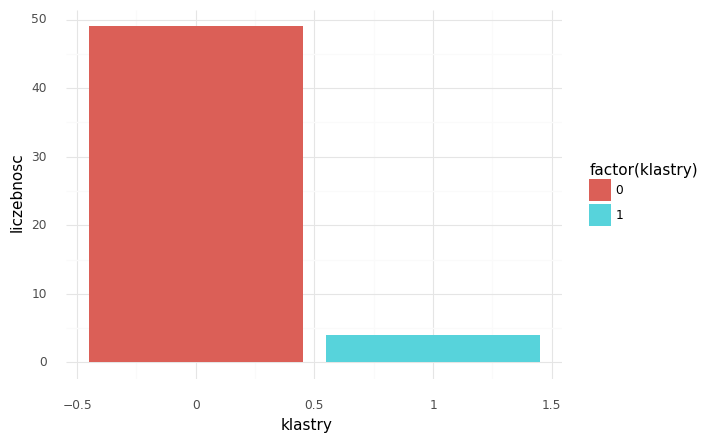

<ggplot: (143917158175)>

In [74]:
(ggplot(auta, aes(x = 'klastry', fill ='factor(klastry)')) +
 geom_bar() +
 theme_minimal() +
 labs(x = 'klastry', y = 'liczebnosc'))

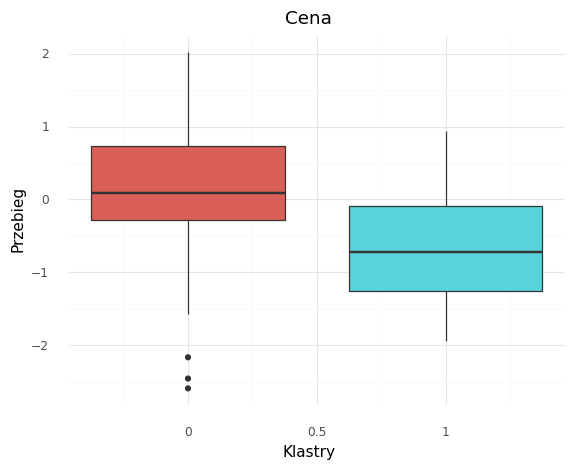

<ggplot: (143916998632)>

In [79]:
(ggplot(auta, aes(x='klastry', y='Przebieg', fill = 'factor(klastry)'))+
 geom_boxplot(show_legend=False) +
 theme_minimal() +
 labs(x = 'Klastry', title = 'Cena'))

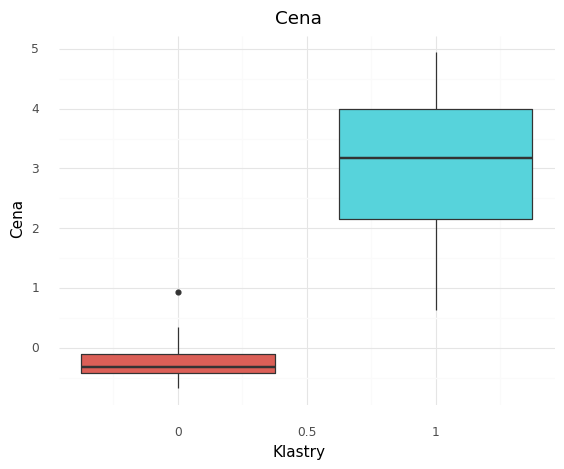

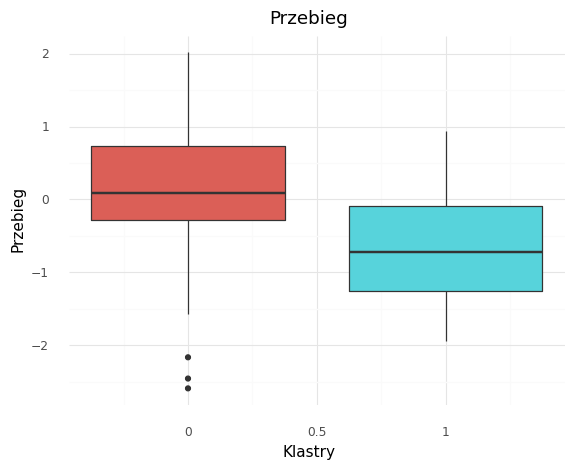

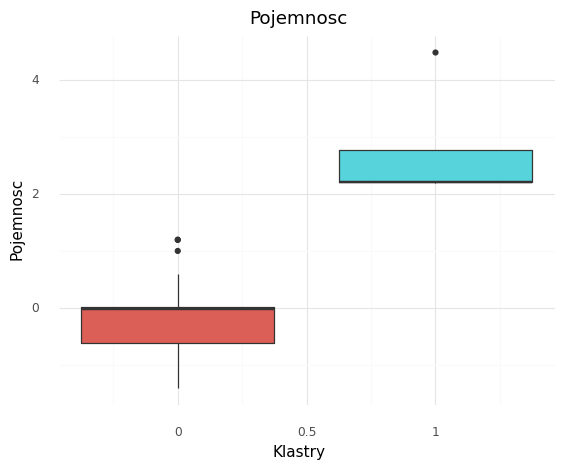

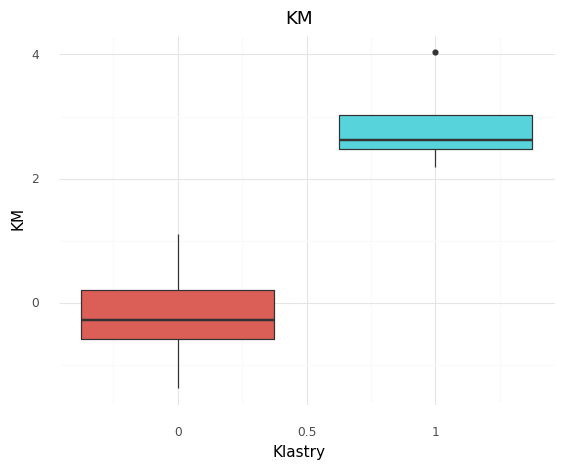

In [80]:
for zm in df.columns[:-1]:
    print((ggplot(auta, aes(x='klastry', y=zm, fill = 'factor(klastry)'))+
 geom_boxplot(show_legend=False) +
 theme_minimal() +
 labs(x = 'Klastry', title = zm)))

grupa 0 charakteryzuje sie wysokim przebiegiem, niska cena, niska pojemnoscia i niska liczba KM <br>
grupa 1 charakteryzuje sie niskim przebiegiem, wysoka cena, wysoka pojemnoscia oraz wysoka liczba KM